In [144]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import json

The resulting dataframes after import are

df_water     --->                   Percentage of clean drinking water 

df_expend    --->                     health expenditure as a percentage of gdp

df_sanitation   --->                  Pecentage of population with access to basic sanitation

df_adolescent_births   --->            Adolelscent birth rate

df_life_exp    --->                   Life expectancy in years



In [130]:
# Opening JSON file
f = open('json_drinking_water.json')
data = json.load(f)
x = pd.json_normalize(data["fact"])

In [131]:
df_water = pd.DataFrame(x)
#df_water = df_water.drop(['dims.GHO',], axis=1)
df_water.rename(columns={"dims.COUNTRY": "Country", "dims.YEAR": "Year",'dims.RESIDENCEAREATYPE': 'Area'})
df_water.head()

,Value,dims.COUNTRY,dims.YEAR,dims.GHO,dims.RESIDENCEAREATYPE
0,75,Afghanistan,2020,Population using at least basic drinking-water...,Total
1,100,Afghanistan,2020,Population using at least basic drinking-water...,Urban
2,66,Afghanistan,2020,Population using at least basic drinking-water...,Rural
3,28,Afghanistan,2020,Population using safely managed drinking-water...,Total
4,36,Afghanistan,2020,Population using safely managed drinking-water...,Urban


In [141]:
f = open('current_health_expend.json')
data = json.load(f)
x = pd.json_normalize(data["fact"])
df_expend = pd.DataFrame(x)
df_expend = df_expend.drop(['dims.GHO',], axis=1)
df_expend.rename(columns={"Value":"Percentage","dims.COUNTRY": "Country", "dims.YEAR": "Year"})

,Percentage,Country,Year
0,13.24,Afghanistan,2019
1,14.13,Afghanistan,2018
2,12.62,Afghanistan,2017
3,11.82,Afghanistan,2016
4,10.11,Afghanistan,2015
...,...,...,...
3769,8.13,Zimbabwe,2014
3770,7.11,Zimbabwe,2013
3771,6.92,Zimbabwe,2012
3772,8.08,Zimbabwe,2011


In [139]:
df_expend.head()

,Value,dims.COUNTRY,dims.YEAR
0,13.24,Afghanistan,2019
1,14.13,Afghanistan,2018
2,12.62,Afghanistan,2017
3,11.82,Afghanistan,2016
4,10.11,Afghanistan,2015


In [135]:
sanitation = pd.read_csv('safelySanitization.csv')

In [91]:
df_sanitation = pd.DataFrame(sanitation)
df_sanitation = df_sanitation.drop(['Indicator'], axis=1)
df_sanitation.rename(columns ={'First Tooltip':'Percentage','Period':'Year'})

,Location,Year,Dim1,Percentage
0,Albania,2017,Total,39.86
1,Albania,2017,Urban,40.17
2,Albania,2017,Rural,39.39
3,Albania,2016,Total,39.85
4,Albania,2016,Urban,40.17
...,...,...,...,...
3650,Zimbabwe,2004,Urban,22.81
3651,Zimbabwe,2003,Urban,23.31
3652,Zimbabwe,2002,Urban,23.31
3653,Zimbabwe,2001,Urban,23.31


In [97]:
adolescent_births = pd.read_csv('adolescentBirthRate.csv')
df_adolescent_births = pd.DataFrame(adolescent_births)
df_adolescent_births.head()
df_adolescent_births.rename(columns ={'First Tooltip':'Percentage','Period':'Year'})

,Location,Year,Indicator,Percentage
0,Afghanistan,2017,Adolescent birth rate (per 1000 women aged 15-...,62.0
1,Afghanistan,2014,Adolescent birth rate (per 1000 women aged 15-...,77.2
2,Afghanistan,2013,Adolescent birth rate (per 1000 women aged 15-...,87.0
3,Afghanistan,2011,Adolescent birth rate (per 1000 women aged 15-...,125.7
4,Afghanistan,2009,Adolescent birth rate (per 1000 women aged 15-...,80.0
...,...,...,...,...
2184,Zimbabwe,2008,Adolescent birth rate (per 1000 women aged 15-...,112.0
2185,Zimbabwe,2007,Adolescent birth rate (per 1000 women aged 15-...,102.6
2186,Zimbabwe,2004,Adolescent birth rate (per 1000 women aged 15-...,98.7
2187,Zimbabwe,2003,Adolescent birth rate (per 1000 women aged 15-...,101.0


In [102]:
life_exp = pd.read_csv('lifeExpectancyAtBirth.csv')
df_life_exp = pd.DataFrame(life_exp)
df_life_exp.head()
df_life_exp = df_life_exp.drop(['Indicator'], axis=1)
df_life_exp.rename(columns ={'First Tooltip':'Percentage','Period':'Year','Dim1':'Sex'})

,Location,Year,Sex,Percentage
0,Afghanistan,2019,Both sexes,63.21
1,Afghanistan,2019,Male,63.29
2,Afghanistan,2019,Female,63.16
3,Afghanistan,2015,Both sexes,61.65
4,Afghanistan,2015,Male,61.04
...,...,...,...,...
2192,Zimbabwe,2010,Male,49.58
2193,Zimbabwe,2010,Female,53.21
2194,Zimbabwe,2000,Both sexes,46.57
2195,Zimbabwe,2000,Male,45.15


In [124]:
# import world happiness data

wh_2015 = pd.read_csv('wh_2015.csv')
df_wh_2015 = pd.DataFrame(wh_2015)
df_wh_2015=df_wh_2015.rename(columns={df_wh_2015.columns[3]: 'Score'})


wh_2016 = pd.read_csv('wh_2016.csv')
df_wh_2016 = pd.DataFrame(wh_2016)
df_wh_2016=df_wh_2016.rename(columns={df_wh_2016.columns[3]: 'Score'})



wh_2017 = pd.read_csv('wh_2017.csv')
df_wh_2017 = pd.DataFrame(wh_2017)
df_wh_2017=df_wh_2017.rename(columns={df_wh_2017.columns[1]: 'Happiness Rank'})
df_wh_2017=df_wh_2017.rename(columns={df_wh_2017.columns[2]: 'Score'})


wh_2018 = pd.read_csv('wh_2018.csv')
df_wh_2018 = pd.DataFrame(wh_2018)
df_wh_2018.rename(columns ={'Overall rank': 'Happiness Rank'})
df_wh_2018=df_wh_2018.rename(columns={df_wh_2018.columns[0]: 'Happiness Rank'})
df_wh_2018=df_wh_2018.rename(columns={df_wh_2018.columns[1]: 'Country'})

wh_2019 = pd.read_csv('wh_2019.csv')
df_wh_2019 = pd.DataFrame(wh_2019)

df_wh_2019=df_wh_2019.rename(columns={df_wh_2019.columns[0]: 'Happiness Rank'})
df_wh_2019=df_wh_2019.rename(columns={df_wh_2019.columns[1]: 'Country'})

In [185]:
df_wh_2019

,Happiness Rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [125]:
#top_10_2015 = df_wh_2015.loc[['Happiness Rank']]

#top and bottom happiness 2015
top_10_2015 = df_wh_2015.loc[df_wh_2015['Happiness Rank'] <= 10]
b_10_2015 = df_wh_2015.nlargest(10, 'Happiness Rank')


#top and bottom happiness 2016
top_10_2016 = df_wh_2016.loc[df_wh_2016['Happiness Rank'] <= 10]
b_10_2016 = df_wh_2016.nlargest(10, 'Happiness Rank')



top_10_2017 = df_wh_2017.loc[df_wh_2017['Happiness Rank'] <= 10]
b_10_2017 = df_wh_2017.nlargest(10, 'Happiness Rank')


top_10_2018 = df_wh_2018.loc[df_wh_2018['Happiness Rank'] <= 10]
b_10_2018 = df_wh_2018.nlargest(10, 'Happiness Rank')


top_10_2019 = df_wh_2019.loc[df_wh_2019['Happiness Rank'] <= 10]
b_10_2019 = df_wh_2019.nlargest(10, 'Happiness Rank')


frames = [top_10_2015, b_10_2015]

Rankings_2015 = pd.concat(frames)




Text(0.5, 1.0, 'World Happiness Top and Bottom 10 2015')

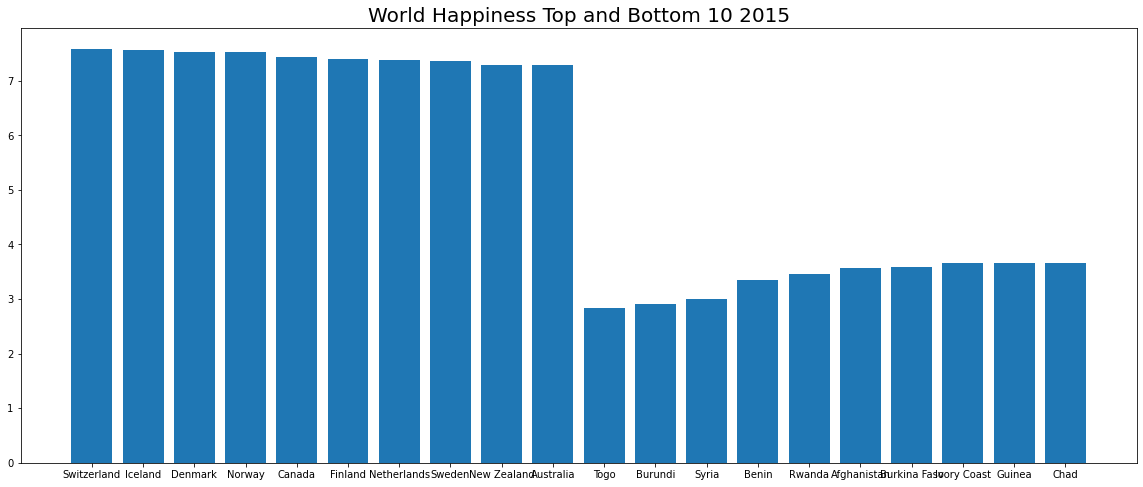

In [107]:
fig = plt.figure(1, [20, 8])
plot_2015 = plt.bar(Rankings_2015['Country'],Rankings_2015['Score'])
plt.title('World Happiness Top and Bottom 10 2015', fontsize =20)

In [180]:
# Multiple Linear Regression 2015

Rankings_2015.head()


mapping = {Rankings_2015.columns[5]: 'GDP Per Capita', Rankings_2015.columns[7]: 'Life Expectancy', Rankings_2015.columns[9]: 'Gov Corruption',Rankings_2015.columns[6]: 'Social Support'}
Rankings_2015 = Rankings_2015.rename(columns=mapping)
Rankings_2015.head()
X = Rankings_2015[['GDP Per Capita','Social Support','Life Expectancy','Freedom', 'Gov Corruption','Generosity']]
Y = Rankings_2015[['Happiness Rank']]
Score = Rankings_2015[['Score']]

#scaler = MinMaxScaler()

#X_scaled = scaler.fit_transform(X.to_numpy())



# Linear Regression to predict happiness Ranking
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Happiness_Prediction = regr.predict([[0.95, 1.2,0.7,0.5,0.2,0.4]])
pred_val = np.int(Happiness_Prediction)


r_sq = regr.score(X, Y)
print('Coefficient of determination:', r_sq)
print()

# Linear Regression to predict Happiness Core
regr = linear_model.LinearRegression()
regr.fit(X, Score)
Happiness_Score_pred = regr.predict([[0.95, 1.2,0.7,0.5,0.2,0.4]])
score_val = np.float(Happiness_Score_pred)



print("Given Inputs Generate a Happiness Ranking of: {}".format(pred_val))

print("Given Inputs Generate a Happiness Score of: {}".format(score_val))


Coefficient of determination: 0.9653775636606741

Given Inputs Generate a Happiness Ranking of: 53
Given Inputs Generate a Happiness Score of: 6.179217831960853


C:\Users\Jason\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Jason\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati